In [6]:
import os
import pandas as pd
import numpy as np # 배열 기반 데이터 처리 패키지, 선형대수(행렬) 처리
import matplotlib  # 시각화 패키지
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns # 히트맵

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

In [7]:
df = pd.read_csv('./output/kto_total.csv')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [8]:
# 매년 매달의 중국 국적 데이터 필터링하기 
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


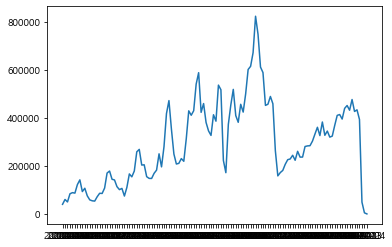

In [9]:
# 시계열 그래프 그리기 1
plt.plot(df_filter['기준년월'], df_filter['관광']) # x, y
plt.show()

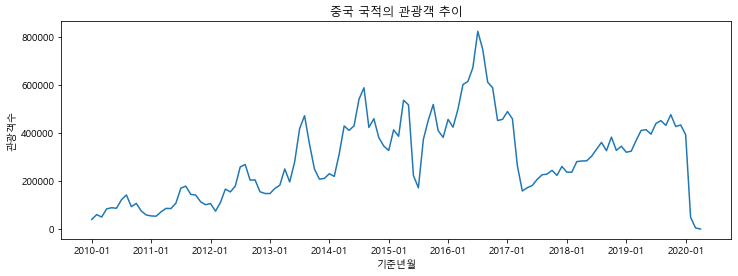

In [10]:
# 시계열 그래프 그리기 2
# 해마다 1월을 기준으로 표시

## 그래프 크기 조절 
plt.figure(figsize = (12, 4))

## 그래프 내용 설정 
plt.plot(df_filter['기준년월'], df_filter['관광'])

## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

## 그래프 표현하기 
plt.show()

In [11]:
# 우리나라 방문하는 외국인 관광객 top5 리스트 만들기 
countries = ['중국', '일본', '대만', '미국', '홍콩']

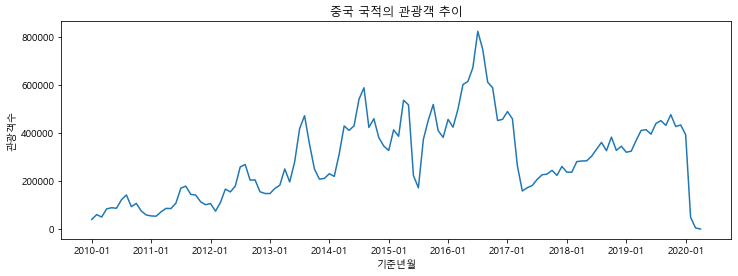

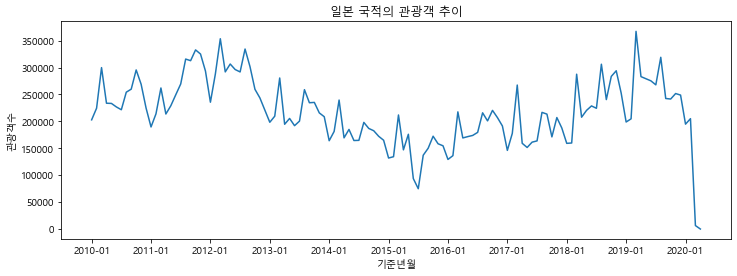

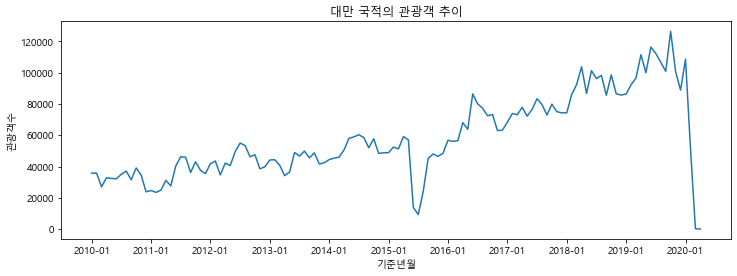

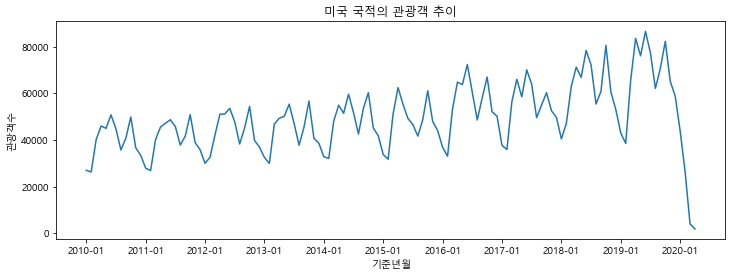

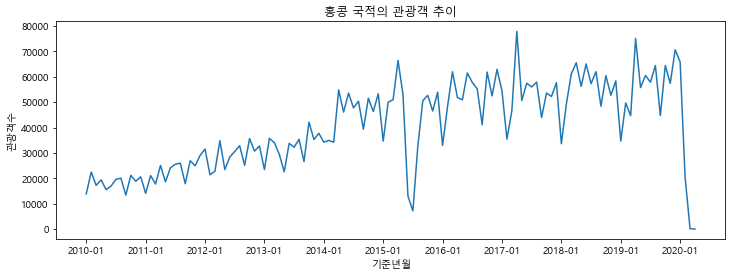

In [12]:
# 반복문으로 여러 그래프 그리기 
for country in countries: 
    # 국적 관광객만 추출하기 
    condition = (df['국적'] == country)
    df_filter = df[condition]

    # 그래프 그리기 
    ## 그래프 크기 조절 
    plt.figure(figsize = (12, 4))
    
    ## 그래프 내용 설정 
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    ## 그래프 타이틀, X축, Y축 이름 달기 
    plt.title('{} 국적의 관광객 추이'.format(country))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    ## x 축 눈금 값 설정 
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

    ## 그래프 표현하기 
    plt.show()

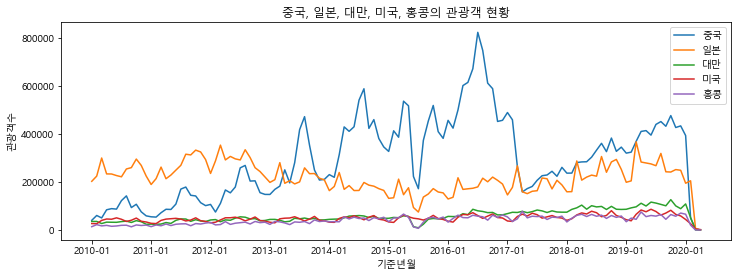

In [13]:
# 5개국의 규모 비교가 되지 않음 -> 하나의 figure 안에 출력하기

## 그래프 크기 조절 
plt.figure(figsize = (12, 4))

for country in countries: 
    # 국적 관광객만 추출하기 
    condition = (df['국적'] == country)
    df_filter = df[condition]
    
    ## 그래프 내용 설정 
    plt.plot(df_filter['기준년월'], df_filter['관광'], label=country) # 라벨을 붙여서 legend를 출력
    
## 그래프 표현하기 
## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국, 일본, 대만, 미국, 홍콩의 관광객 현황')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

plt.legend()

plt.show()

In [14]:
# 히트맵(열 그래프): x:월 y:년도를 기준으로 제작
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [18]:
# 칼럼 삭제 실습, 2020을 년도 칼럼에 추가
# len(df) # 7380 -> 7440
# ['2020'*7380] -> 리스트 안에 있는 하나의 문자열
# ['2020']*7380 -> 7380 길이의 리스트
df['연도'] = ['2020']*7440
df.head() # 년도를 변경할 필요가 있음

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%),연도
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2020
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2020
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2020
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2020
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2020


In [19]:
df.drop(['연도'], axis='columns', inplace=True) # axis=1: 열 기준 삭제
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [20]:
# '연도'를 추가
# df['연도'] = [str1.split('-')[0] for str1 in df['기준년월']]
df['연도'] = df['기준년월'].str.slice(0,4)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%),연도
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010


In [21]:
# '월' 추가
# df['월'] = [str1.split('-')[1] for str1 in df['기준년월']]
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%),연도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [22]:
# 중국인 관광객 필터링
df_cn = df[df['국적'] == '중국']
df_cn

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객 비율(%),전체비율(%),연도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7157,중국,433577,3951,682,13284,57383,508877,2019-12,아시아,85.2,34.8,2019,12
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2,2020,01
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8,2020,02
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0,2020,03


In [23]:
# DataFrame -> pivot_table -> heat map
# 그룹화(index): 연도, 칼럼(columns): 월, 데이터(values): 관광
df_pivot = df_cn.pivot_table(index='연도', columns='월', values='관광', aggfunc='mean')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
연도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [24]:
# 히트맵 그래프 그리기에 필요한 라이브러리 import 
import matplotlib.pyplot as plt 
import seaborn as sns

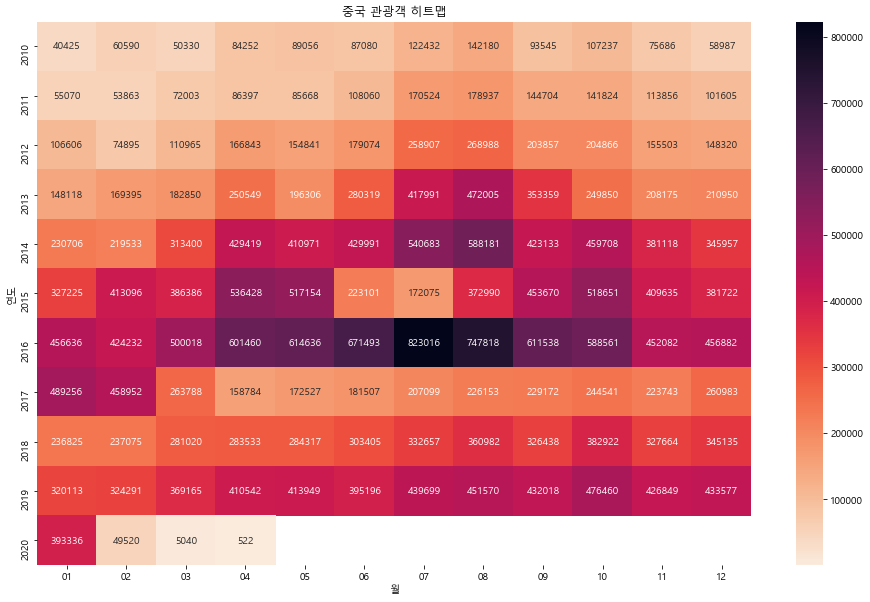

In [25]:
# 히트맵 그리프 그리기 
## 그래프 크기 설정 
plt.figure(figsize = (16, 10))

## 히트맵 그래프 그리기 
# annot = True: 셀에 값 출력, fmt = '.0f':형식 , cmap = 'rocket_r':색상 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

## 그래프 타이틀 달기 
plt.title('중국 관광객 히트맵')

## 그래프 표현 
plt.show()

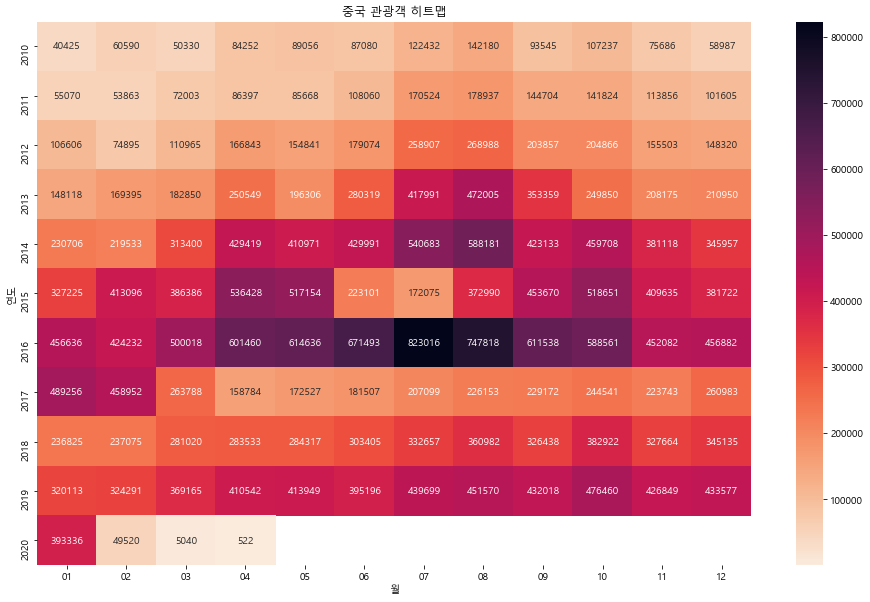

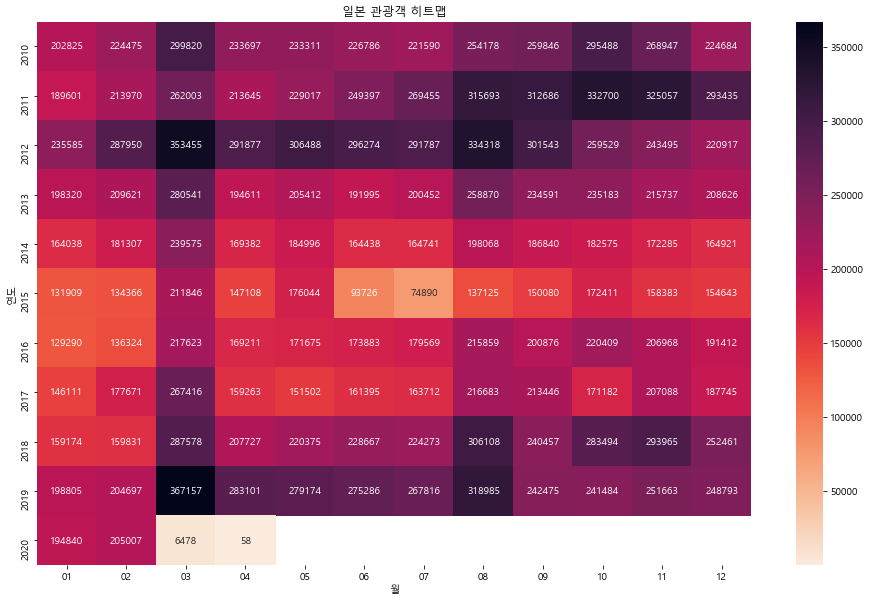

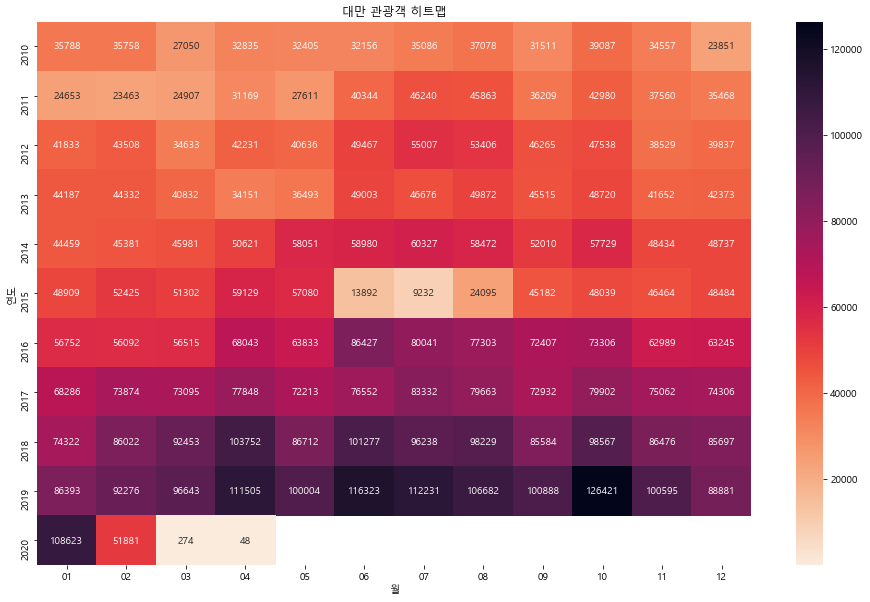

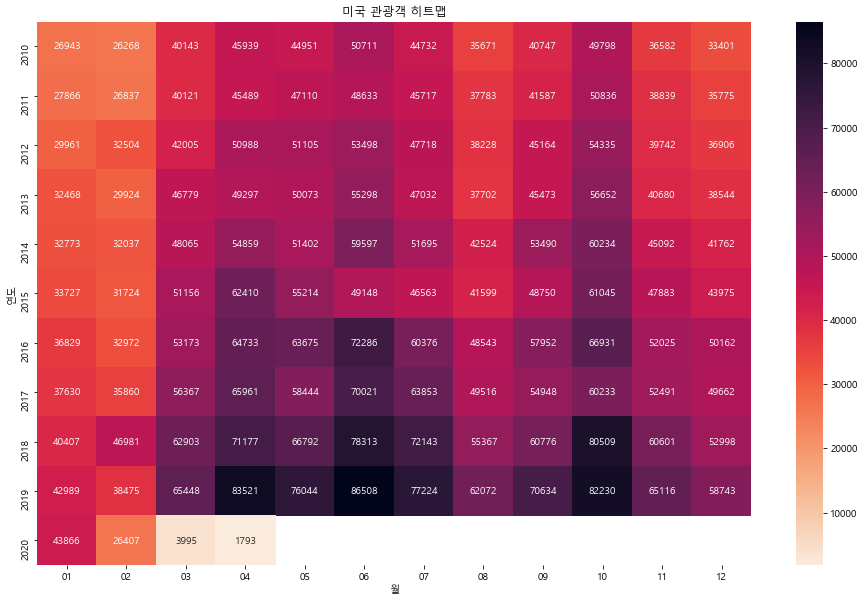

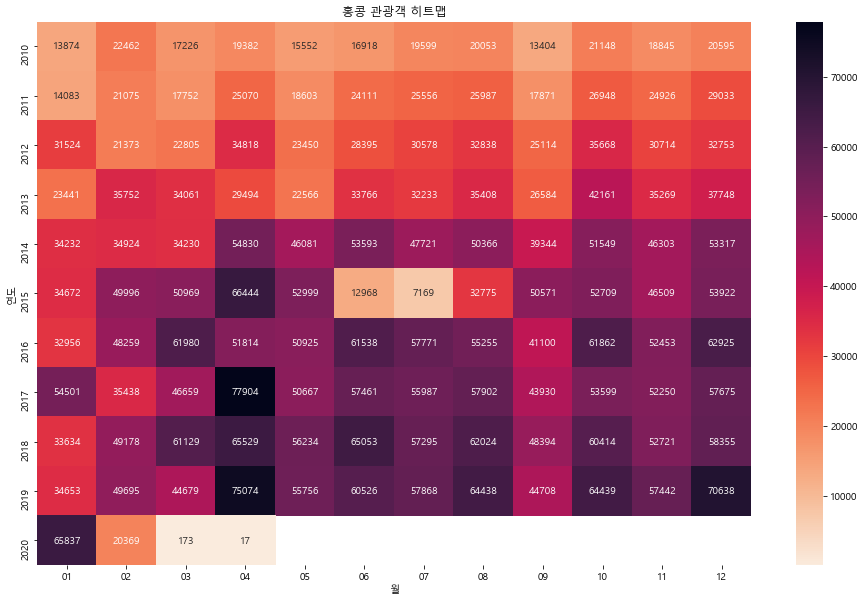

In [30]:
# 5개 국가의 히트맵 그리기 -> 하나씩 그리기
#  반복문으로 top5 국가 히트맵 그래프 그리기 
for country in countries: 
    condition = (df['국적'] == country)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광'
                             , index = '연도'
                             , columns = '월')
    
    # 그래프 크기 설정 
    plt.figure(figsize = (16, 10))

    # 히트맵 그래프 그리기 
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

    # 그래프 타이틀 달기 
    plt.title('{} 관광객 히트맵'.format(country))

    # 그래프 표현
    plt.savefig('./output/country5_heatmap_{0}.png'.format(country))
    plt.show()